<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
import random as rd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

Посмотрим на данные и их описание. Проверим баланс классов в таргете

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Приведем названия колонок к нижнему регистру

In [5]:
df.columns = map(str.lower, df.columns)

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
rownumber,0.00%
customerid,0.00%
surname,0.00%
creditscore,0.00%
geography,0.00%
gender,0.00%
age,0.00%
balance,0.00%
numofproducts,0.00%
hascrcard,0.00%


Для изучения представлен датасет, состоящий из 10000 собитыий и 14 признаков. Данные не имеют явныхх дубликатов. В колонке "Tenure" 9% данных пропущено. Это один из ключевых столбцов для иссследования, по этому попробуем восстановить данные. Всем клиентам банка присваивается id (int64). Можно предполодить, что нумерация сквозная и по колонке id восстановить количество времени, которое клиент пользуется услугами банка

In [11]:
print(df.corr()) 

                 rownumber  customerid  creditscore       age    tenure  \
rownumber         1.000000    0.004202     0.005840  0.000783 -0.007322   
customerid        0.004202    1.000000     0.005308  0.009497 -0.021418   
creditscore       0.005840    0.005308     1.000000 -0.003965 -0.000062   
age               0.000783    0.009497    -0.003965  1.000000 -0.013134   
tenure           -0.007322   -0.021418    -0.000062 -0.013134  1.000000   
balance          -0.009067   -0.012419     0.006268  0.028308 -0.007911   
numofproducts     0.007246    0.016972     0.012238 -0.030680  0.011979   
hascrcard         0.000599   -0.014025    -0.005458 -0.011721  0.027232   
isactivemember    0.012044    0.001665     0.025651  0.085472 -0.032178   
estimatedsalary  -0.005988    0.015271    -0.001384 -0.007201  0.010520   
exited           -0.016571   -0.006248    -0.027094  0.285323 -0.016761   

                  balance  numofproducts  hascrcard  isactivemember  \
rownumber       -0.009067   

Предположение не оправдалось. id мог быть выдан много лет назад и тогда же клиент мог прекратить пользоваться услугами банка. Т.к. нет привязки к датам, такой метод не подойдет. Явной зависимости между каким-либо признаком и продолжительностью пользования услугами банка не выявлено. Интересно, что есть слабая корреляция между возрастом и фактом ухода. Посмотрим на строки с пустыми значениями

In [12]:
df[df['tenure'].isna()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Можно предполодить, что пропуски признака "tenure" могут быть связаны с тем, что клиент только стал клиентом банка и тут же отказался от услуг. Но у таких клиентов навряд-ли было бы много денег на счету, и более 1 продукта. Посмотрим, как выглядят клиенты, пробывшие с банком 0 лет, выявим их типичные признаки

In [13]:
df[df['tenure']==0]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
149,150,15794413,Harris,416,France,Male,32,0.0,0.00,2,0,1,878.87,0
164,165,15658929,Taverner,683,Spain,Male,29,0.0,133702.89,1,1,0,55582.54,1
176,177,15645248,Ho,510,France,Female,30,0.0,0.00,2,1,1,130553.47,0
187,188,15708710,Ford,525,Spain,Female,37,0.0,0.00,1,0,1,131521.72,0
231,232,15627000,Freeman,610,France,Male,40,0.0,0.00,2,1,0,62232.60,0


In [15]:
df['tenure'] = df['tenure'].fillna(rd.randint(df['tenure'].min(), df['tenure'].max()))
df_clear = df
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Информация в столбцах rownumber, customerid, surname никак не характеризует поведенческие особенности клиента, по этому для упрощения модели удалим данные столбцы. 

In [16]:
df_clear = df_clear.drop(['rownumber'], axis=1)
df_clear = df_clear.drop(['customerid'], axis=1)
df_clear = df_clear.drop(['surname'], axis=1)
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Избавимся от категориальных данных методом OHE

In [17]:
df_clear = pd.get_dummies(df_clear, drop_first=True)

Датасет готов для исследования

## Исследование задачи

Исследуем баланс класоов по целевому признаку "exited"

In [18]:
balance_pivot = df_clear.pivot_table(index='exited', values='creditscore', aggfunc='count').reset_index()
balance_pivot.columns = ['exited', 'count']
balance_pivot['ratio']=balance_pivot['count']/balance_pivot['count'].sum()
balance_pivot

,exited,count,ratio
0,0,7963,0.7963
1,1,2037,0.2037


Положительные значения признака exited отностятся к общему числу случааем, как 1/5. Датасет не сбалансирован по таргету. Попробуем выстроить модели на несбалансированных данных. Для этого разобьем данные на обучающие, валидационные и тестовые выборки

In [19]:
target_disb = df_clear['exited']
features_disb = df_clear.drop(['exited'], axis=1)

features_train, features_disb_prevalid, target_train, target_disb_prevalid = train_test_split(features_disb, target_disb, test_size=0.4, random_state=5)
features_test, features_valid, target_test, target_valid = train_test_split(features_disb_prevalid, target_disb_prevalid, test_size=0.5, random_state=5)

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


#### LogisticRegression

In [20]:
#%%time
model_disb_lr = LogisticRegression(random_state=5, solver='lbfgs', max_iter=1000) 
model_disb_lr.fit(features_train, target_train)
predicted_disb_valid_lr = model_disb_lr.predict(features_valid)


In [21]:
print("accurency = ", model_disb_lr.score(features_valid, target_valid))
print('recall = ',recall_score(target_valid, predicted_disb_valid_lr))
print('precision = ',precision_score(target_valid, predicted_disb_valid_lr))
print('f1 = ', f1_score(target_valid, predicted_disb_valid_lr))

accurency =  0.79
recall =  0.05365853658536585
precision =  0.4074074074074074
f1 =  0.09482758620689655


при явном дисбалансе на высокий accurency полагаться не стоит. Pretision = 0.38 и recall = 0.04 говорят о малом количестве ложно положительных ответов и большем количестве ложноотрицательных

#### DecisionTreeClassifier

f1 лучшей модели: 0.5580029368575624
глубина лучшей модели: 7
recall лучшей модели =  0.4634146341463415
precision  лучшей модели =  0.7011070110701108


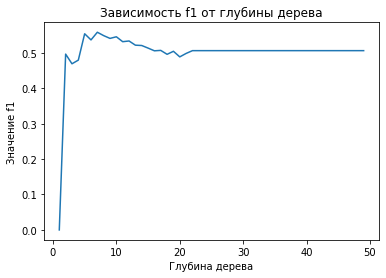

In [22]:
best_model_disb_dtc = None
best_f1_disb_dtc = 0
best_depth_disb_dtc = 0
f1_disb_list=[]
depth_disb_list=[]

for i_disb_dtc in range(1, 50): # в цикле подставим в дерево разные глубины от 1 до 10
    model_disb_dtc = DecisionTreeClassifier(random_state=5, max_depth = i_disb_dtc) 
    model_disb_dtc.fit(features_train, target_train)
    predictions_disb_dtc = model_disb_dtc.predict(features_valid) # обучим модель на валидационной выборке
    result_disb_dtc = f1_score(target_valid, predictions_disb_dtc) # подсчитаем accuracy модели по предсказанию и валидационной целевой выборке

    f1_disb_list.append(result_disb_dtc)
    depth_disb_list.append(i_disb_dtc)

    if result_disb_dtc > best_f1_disb_dtc:
        best_model_disb_dtc = model_disb_dtc
        best_f1_disb_dtc = result_disb_dtc
        best_depth_disb_dtc = i_disb_dtc
        
print("f1 лучшей модели:", best_f1_disb_dtc)
print("глубина лучшей модели:", best_depth_disb_dtc)

print('recall лучшей модели = ',recall_score(target_valid, best_model_disb_dtc.predict(features_valid)))
print('precision  лучшей модели = ',precision_score(target_valid, best_model_disb_dtc.predict(features_valid)))

plt.plot(depth_disb_list, f1_disb_list)
plt.title('Зависимость f1 от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('Значение f1')
plt.show()


Высокий показатель precisiso говорит о малом кол-ве ложно негативных ответов модели. Приемлемо высокий recall свидетельствует о малом кол-ве ложно отрицательных ответов

#### RandomForestClassifier

In [ ]:
%%time
best_model_disb_rf = None
best_result_disb_rf = 0
best_est_disb_rf = 0
best_depth_disb_rf = 0
for i_disb_rf in range(1,60): #итератор i_disb_rf используем для подбора оптимальной глубины деревьев
    for est_disb_rf in range(1, 60): #итератор est_disb_rf используем для подбора оптимального кол-ва деревьев
        model_disb_rf = RandomForestClassifier(random_state=5, n_estimators=est_disb_rf, max_depth=i_disb_rf) #передамим в гиперпараметры итераторы 2_х вложенных циклов
        model_disb_rf.fit(features_train, target_train) # обучим модель на тренировочной выборке
        result_disb_rf = f1_score(target_valid, model_disb_rf.predict(features_valid)) # оценим качество модели
        if result_disb_rf > best_result_disb_rf:
            best_model_disb_rf = model_disb_rf #сохраняем лучшую модель,
            best_result_disb_rf = result_disb_rf  #лучшую точность
            best_est_disb_rf = est_disb_rf #лучшее кол-во деревьев
            best_depth_disb_rf = i_disb_rf #лучшую глубину
 
print('recall лучшей модели = ',recall_score(target_valid, best_model_disb_rf.predict(features_valid)))
print('precision  лучшей модели = ',precision_score(target_valid, best_model_disb_rf.predict(features_valid)))

print("f1 наилучшей модели:", best_result_disb_rf)
print("при количестве оценщиков:", best_est_disb_rf)
print("и глубине деревьев:", best_depth_disb_rf)

Вывод: были исследованы 3 модели классификации, к ним подобраны оптимальные гиперпараметры исходя из показателей f1. Лучшей оказалась модель  Случайный Лес с 19_ю оценщиками и глубиной деревьев 22. 

## Борьба с дисбалансом

Принимая во внимание перекос значений целевого показателя в сторону отрицательных значений попытаемся улучшить показатели модели путем балансировки выборки. Установим параметр class_weight

#### LogisticRegression

In [ ]:
model_lr = LogisticRegression(random_state=5, solver='lbfgs', max_iter=1000, class_weight='balanced') 
model_lr.fit(features_train, target_train) 
predicted_valid_lr = model_lr.predict(features_valid)

print('recall = ',recall_score(target_valid, predicted_valid_lr))
print('precision = ',precision_score(target_valid, predicted_valid_lr))
print('f1 = ', f1_score(target_valid, predicted_valid_lr))

После балансировки значение f1 логистической регрессии увеличилось почти в 10 раз за счет значительного увеличения значения recall. 

Для Случайного леса и Решающего дерева сбалансируем тренировочную выборку в ручную

In [ ]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

features_upsampled = pd.concat([features_zeros] + [features_ones] * 5)
target_upsampled = pd.concat([target_zeros]+[target_ones] * 5)

#### DecisionTreeClassifier

In [ ]:
%%time
best_model_dtc = None
best_f1_dtc = 0
best_depth_dtc = 0
f1_list=[]
depth_list=[]

for i_dtc in range(1, 20): # в цикле подставим в дерево разные глубины от 1 до 10
    model_dtc = DecisionTreeClassifier(random_state=5, max_depth = i_dtc) 
    model_dtc.fit(features_upsampled, target_upsampled)
    predictions_dtc = model_dtc.predict(features_valid) # обучим модель на валидационной выборке
    result_dtc = f1_score(target_valid, predictions_dtc) # подсчитаем accuracy модели по предсказанию и валидационной целевой выборке


    if result_dtc > best_f1_dtc:
        best_model_dtc = model_dtc
        best_f1_dtc = result_dtc
        best_depth_dtc = i_dtc
        
print('recall лучшей модели = ',recall_score(target_valid, best_model_dtc.predict(features_valid)))
print('precision  лучшей модели = ',precision_score(target_valid, best_model_dtc.predict(features_valid)))        
        
print("f1 лучшей модели:", best_f1_dtc)
print("глубина лучшей модели:", best_depth_dtc)


#### RandomForestClassifier

In [ ]:
%%time
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for i_rf in range(1,20): #итератор i_rf используем для подбора оптимальной глубины деревьев
    for est_rf in range(1,25): #итератор est_rf используем для подбора оптимального кол-ва деревьев
        model_rf = RandomForestClassifier(random_state=5, n_estimators=est_rf, max_depth=i_rf) #передамим в гиперпараметры итераторы 2_х вложенных циклов
        model_rf.fit(features_upsampled, target_upsampled) # обучим модель на тренировочной выборке
        predictions_rf = model_rf.predict(features_valid) # обучим модель на валидационной выборке
        result_rf = f1_score(target_valid, predictions_rf) # подсчитаем accuracy модели по предсказанию и валидационной целевой выборке
        if result_rf > best_result_rf:
            best_model_rf = model_rf #сохраняем лучшую модель,
            best_result_rf = result_rf  #лучшую точность
            best_est_rf = est_rf #лучшее кол-во деревьев
            best_depth_rf = i_rf #лучшую глубину
 
print('recall лучшей модели = ',recall_score(target_valid, best_model_rf.predict(features_valid)))
print('precision  лучшей модели = ',precision_score(target_valid, best_model_rf.predict(features_valid)))        
        
print("f1 лучшей модели:", best_result_rf)

print("при количестве оценщиков:", best_est_rf)
print("и глубине деревьев:", best_depth_rf)

Вывод: сравнивая модели классификации можно отметить значительное улучшение показателей precision, recall и, как следствие, f1, по сравнению с обучением на несбалансированной выборке. Лучшей, оказалась модель случайного леса с количеством деревьев 10 и их глубиной 8. 

## Тестирование модели

Выбрав лучшую модель, проверим его на тестовой выборке.

In [ ]:

predictions_test = best_model_rf.predict(features_test) # обучим модель на валидационной выборке
result_rf_test = f1_score(target_test, predictions_test) # подсчитаем accuracy модели по предсказанию и валидационной целевой выборке
 
print('recall лучшей модели = ',recall_score(target_test, predictions_test))
print('precision  лучшей модели = ',precision_score(target_test, predictions_test))        
        
print("f1 лучшей модели:", result_rf_test)


Оценим ROC для выбранной модели

In [ ]:
probabilities_valid = best_model_rf.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

plt.figure()
plt.plot(fpr,tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_test ,probabilities_one_valid)
auc_roc

Площадь под кривой ROC 0.86 свидетельствует о высоком качетсве модели

#### Общий вывод

В рамках проектра поставлена задача построения модели для классификации на основе исторических данных, которая укажет на потенциально нелояльного банку клиента  данных. Для реализации предоставлены данные о клиентах и продуктах. В части предоставленных данных отсутсвовала информация по ключевому параметру - времени пользования услугами банка. Учитывая общий объем данных, достаточный для обучения было принято решение удалить строки без этого паратетра. В данных был выявлен дисбаланс целевого показателя 5/1 отрицательного класса к положительному. 

В ходе выполнения проекта рассмотрены 3 модели: 1) Решающее дерево, 2) Случайный лес, 3) Логистическая регрессия. Модели рассмотрены на нескольких типах данных - сбалансированных и не сбалансированных. Путем подбора различных гиперпараметров и сравнения результатов выялено, что с поставленной задачей наилучшим образом справляется модель "Случайный лес" с количеством деревьев 10 и глубиной 8. Побдор модели выпонен на датасете, разбитом на ттренировочную, валидационную и тестовую выборки в пропорции 3:1:1. Модель Случайный лес с побобранными гиперпараметрами была проверена на тестовой выборке и показала 0.6 значения f1. Для выбранной модели построна кривая ROC, подсчитана AUC-ROC = 0.86, что свидетельствует о высоком качестве модели

Итог: лучшей моледью для решения текущей задачи по рекомендации тарифов является "Случайный лес", 10 деревьев, 8 узлов. Данную модель можно использовать для предсказния потенциального оттока клиентов и прнятия привентивных мер по их удержанию